In [1]:
# Generic packages
import numpy as np 
import matplotlib.pyplot as plt
from os import listdir
import pickle

# Style 
plt.style.use('dark_background')
#seaborn-pastel

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.model_selection import train_test_split
from sklearn.manifold import Isomap, TSNE, SpectralEmbedding, LocallyLinearEmbedding, MDS
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, AffinityPropagation, MeanShift
from sklearn.cross_decomposition import CCA, PLSCanonical

from sklearn.preprocessing import StandardScaler

from numpy import trapz
from scipy.signal import savgol_filter
import torch

In [2]:
def build_dataset(path,size):
    """
    build_dataset(path)

        Import dataset from path, normalize data and separate in train and test datasets.

        -path (str) : Path to the dataset files. 
    """
    X = np.concatenate([np.fromfile(f"{path}{fileName}",dtype=np.float16).reshape(-1,size) for fileName in listdir(path)])
    shape = np.shape(X)

    #X = (X - np.mean(X)) / (np.std(X))
    
    return X

In [3]:
def reduction(X,function,plot=False, **param):
    """
    # reduction(X,function,plot=False,**param)

    Verifies if a function has been saved in the `DR preprocess` folder to avoid unnecessary computation. 

    -X (array-like, sparse matrix) : Inputs of the function that needs to be computed.
    -function (function) : Function that is executed.
    -param (**kwargs) : Multiple keyword arguments to define the parameters of `function`.
    
    """
    # File name
    file_name = f"{str(function.__name__)}_{str(param.items())}"
    print("File name : ", file_name)

    # Check for existing file
    try:
        result = np.load(f"DR preprocess\{file_name}.npy",allow_pickle=True)

    # Compute operation if file does not exist
    except:
        method = function(**param)
        result = method.fit_transform(X)
        np.save(f"DR preprocess\{file_name}",arr=result)
    
    # Plot results
    if plot:
        plt.scatter(result[:, 0], result[:, 1],alpha=0.005)
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')

    #plt.hist2d(result[:, 0], result[:, 1],bins=300)

    return result

<string>:18: SyntaxWarning: invalid escape sequence '\{'
<string>:24: SyntaxWarning: invalid escape sequence '\{'
<>:18: SyntaxWarning: invalid escape sequence '\{'
<>:24: SyntaxWarning: invalid escape sequence '\{'
<string>:18: SyntaxWarning: invalid escape sequence '\{'
<string>:24: SyntaxWarning: invalid escape sequence '\{'
<>:18: SyntaxWarning: invalid escape sequence '\{'
<>:24: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipykernel_623177/239617101.py:18: SyntaxWarning: invalid escape sequence '\{'
  result = np.load(f"DR preprocess\{file_name}.npy",allow_pickle=True)
/tmp/ipykernel_623177/239617101.py:24: SyntaxWarning: invalid escape sequence '\{'
  np.save(f"DR preprocess\{file_name}",arr=result)


In [4]:
def clustering(X, function, label_return = False,**param):
    """
    # clustering(X,function,**param)

        Run and plot a clustering technique defined with the function parameter.
        The process is based on `sklearn` structure.

    -X (array-like, sparse matrix) : Inputs of the function that needs to be computed.
    -function (function) : Function that is executed.
    -param (**kwargs) : Multiple keyword arguments to define the parameters of `function`.
    """

    labels = function(**param).fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='Pastel2', alpha=0.05)
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')

    if label_return:
        return label_return

In [5]:
signalSize = 250
path_test = 'Datasets/NIST (250) test/'#NIST (800)/'
path_train = 'Datasets/NIST (250) train/'

X_test = np.concatenate([np.fromfile(f"{path_test}{fileName}",dtype=np.float16).reshape(-1,signalSize) for fileName in listdir(path_test)])
X_test = X_test.astype("double")

X_train = np.concatenate([np.fromfile(f"{path_train}{fileName}",dtype=np.float16).reshape(-1,signalSize) for fileName in listdir(path_train)])
X_train = X_train.astype("double")

X = np.concatenate((X_test,X_train))
time = np.linspace(0, 10, signalSize)
#NIST (250)
#plt.figure(figsize=(5,3), dpi=200)
#plot = [plt.plot(time, i,alpha=0.1, color=[1,1,1], linewidth=0.1) for i in X]

plt.ylabel("Normalized Voltage (a.u.)")
plt.xlabel("Time (a.u.)")
#plt.yticks([])
#plt.xticks([])
#plt.savefig('Trace_NIST.png', transparent=True)


FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/NIST (250) test/'

### Filter (Savitzky-Golay)

In [ ]:
X_filter = savgol_filter(X, 20, 2) # window size 51, polynomial order 3
np.shape(X_filter)

(143360, 250)

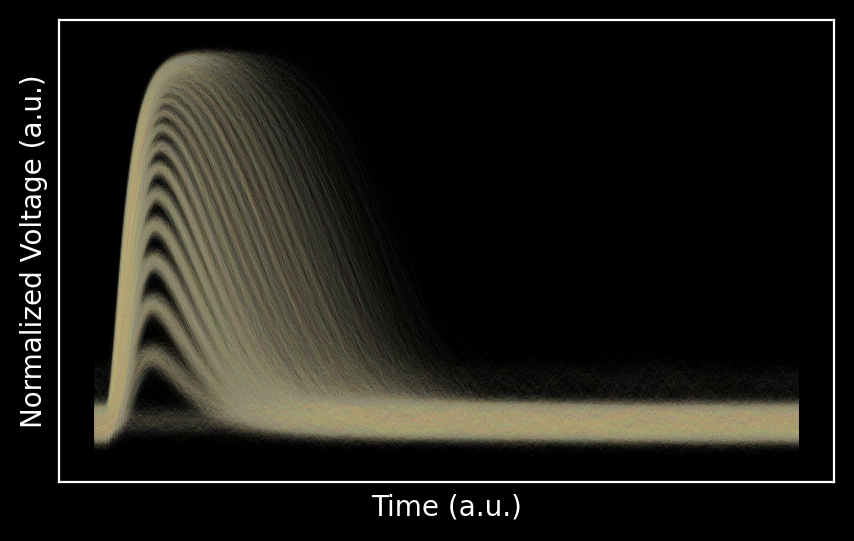

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
plot = [plt.plot(time, i, linewidth=0.1, alpha=0.05) for i in X[::10]]

plt.ylabel("Normalized Voltage (a.u.)")
plt.xlabel("Time (a.u.)")
plt.yticks([])
plt.xticks([])
plt.savefig('Presentation/Trace_NIST.png', transparent=True)

### MAX VALUE

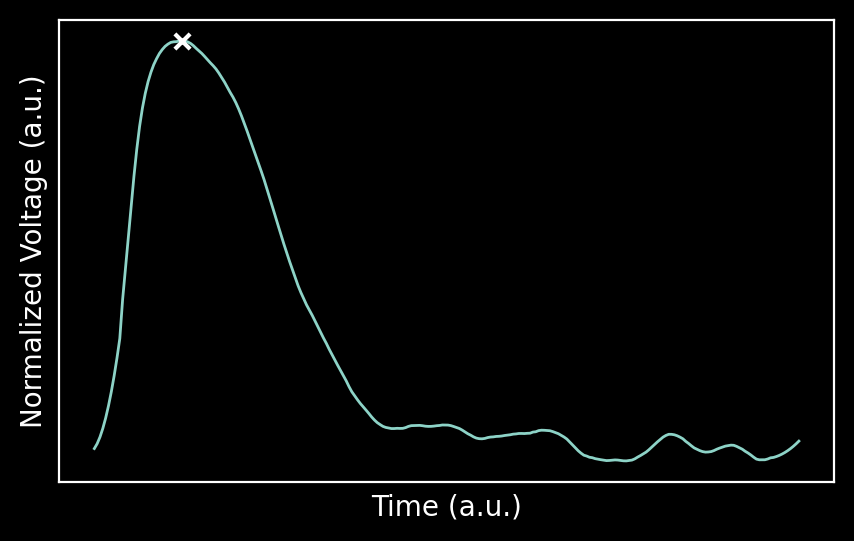

In [ ]:
plt.figure(figsize=(5,3), dpi=200)

arg_max = np.argmax(X_filter[0])
plt.scatter(time[arg_max], X_filter[0][arg_max],s=30, marker="x",color=[1,1,1], zorder=10)
plt.plot(time, X_filter[0], linewidth=1, alpha=1)

plt.ylabel("Normalized Voltage (a.u.)")
plt.xlabel("Time (a.u.)")
plt.yticks([])
plt.xticks([])
plt.savefig('Presentation/Trace_MAX.png',format="svg", transparent=True)

(143360,)


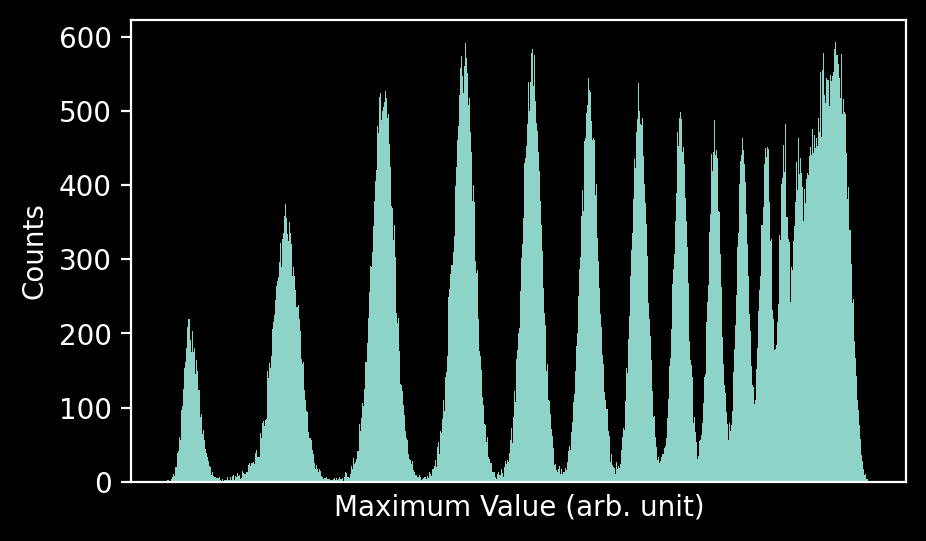

In [ ]:
max_value = np.max(X_filter, axis=1)
print(np.shape(max_value))
plt.figure(figsize=(5,3), dpi=200)
pl = plt.hist(max_value, bins=700)

#plt.yticks([])
plt.xticks([])
plt.xlabel("Maximum Value (arb. unit)")
plt.ylabel("Counts")
plt.savefig('Presentation/MAX.svg',format="svg", transparent=True)



### AREA

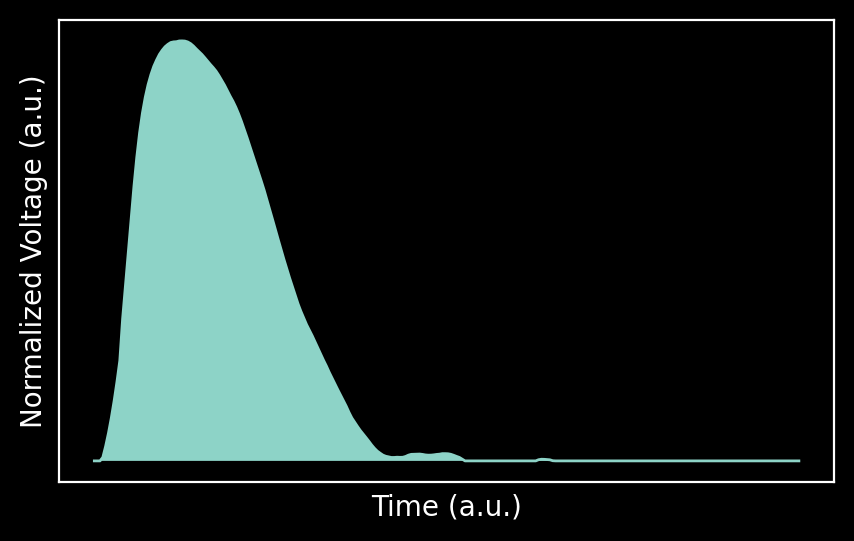

In [ ]:
X_area = X_filter.copy()
X_area[X_area < 0.13] = 0.13

plt.figure(figsize=(5,3), dpi=200)

arg_max = np.argmax(X_area[0])
plt.plot(time, X_area[0], linewidth=1, alpha=1)
plt.fill_between(time, 0.13, X_area[0])

plt.ylabel("Normalized Voltage (a.u.)")
plt.xlabel("Time (a.u.)")
plt.yticks([])
plt.xticks([])
plt.savefig('Presentation/Trace_AREA.svg',format="svg", transparent=True)

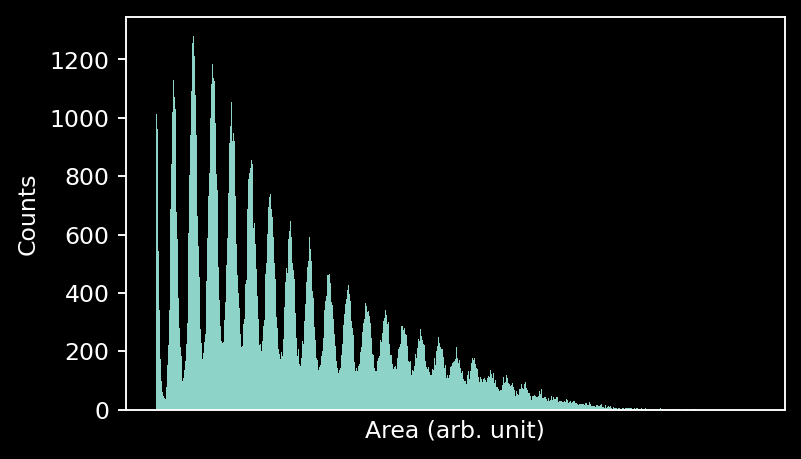

In [ ]:
area = trapz(X_area, dx=1)

plt.figure(figsize=(5,3), dpi=170)
plt.hist(area, bins=700)

plt.xticks([])
plt.xlabel("Area (arb. unit)")
plt.ylabel("Counts")
plt.savefig('Presentation/AREA.png', transparent=True)


### PCA

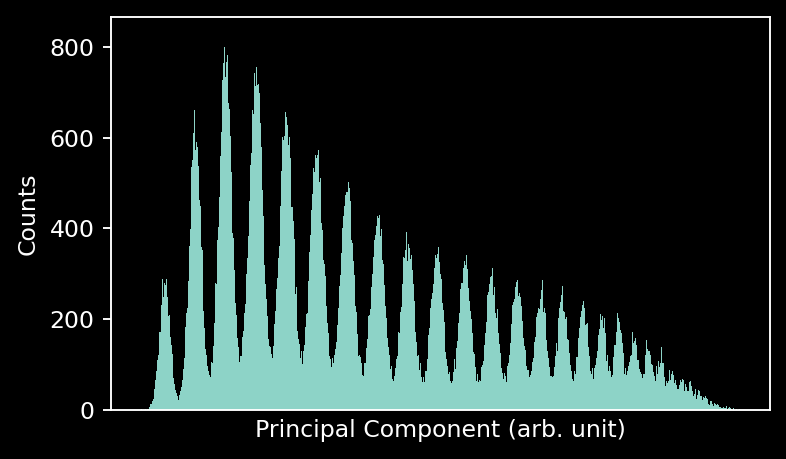

In [ ]:
pca = PCA(n_components=1, svd_solver="full")
X_pca = pca.fit_transform(X)

plt.figure(figsize=(5,3), dpi=170)
pl = plt.hist(X_pca, bins=700)

plt.xticks([])
plt.xlabel("Principal Component (arb. unit)")
plt.ylabel("Counts")
plt.savefig('Presentation/PCA.svg',format="svg", transparent=True)

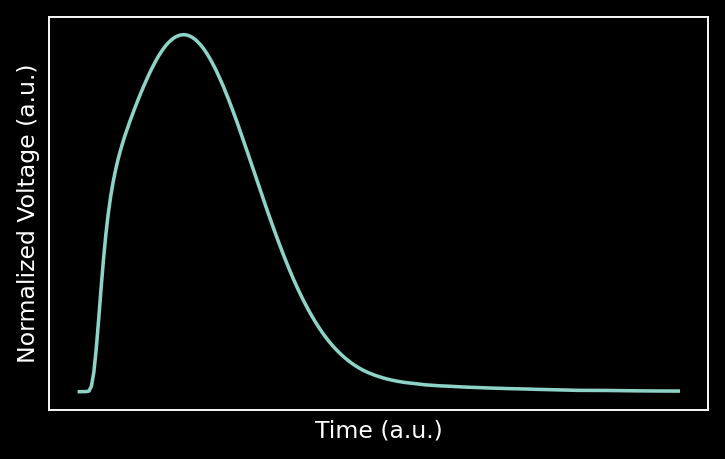

In [ ]:
N = 1
plt.figure(figsize=(5,3), dpi=170)
plot = [plt.plot(time, pca.components_[i], label=f"{i+1}") for i in range(N)]
plt.ylabel(r"Normalized Voltage (a.u.)")
plt.xlabel("Time (a.u.)")
plt.yticks([])
plt.xticks([])
plt.savefig('Presentation/PCA_first.svg',format="svg", transparent=True)

### Autoencoder

In [100]:
config = {
'files' : {
        'dataset'                  : "NIST (250)",
        'path_save'                : 'Autoencoder Log/',
        'input_dimension'          : 250
        },
'sweep' : {
        'sweep_name'               : None,
        'activation_possibilty'    : ['ReLU', 'Sigmoid', 'CELU', 'Softmax', 'Softmin', 'Hardshrink', 
                                        'LeakyReLU', 'ELU', 'LogSigmoid', 'PReLU', 'GELU', 'SiLU', 
                                        'Mish', 'Softplus', 'Softsign', 'Tanh'],
        'layer_size_possibility'   : [5,50,75,100,200],
        'search_type'              : 'grid_search',
        'search_param'             : [('train','epochs'),('train','learning_rate')]
        },
'run' : {
        'activation_list'          : ['GELU', 'PReLU', 'GELU'],
        'layer_list'               : [200, 50, 1, 50, 200],
        'layer_number'             : 4,
        },
'network' : {
        'output_dimension'         : 1,
        'skip_elements'            : 1,
        'layer_type'               : 'Linear',
        },
'train' : {
        'train_size'               : 0.8,
        'batch_number'             : 1,
        'k-fold'                   : 2, 
        'optimizer'                : 'adam',
        'criterion'                : 'MSELoss',
        'epochs'                   : 3,
        'learning_rate'            : 1e-4
        }
}

In [130]:
from autoencoder import autoencoder, build_autoencoder

experiment = autoencoder()
model = build_autoencoder
network = model(config)

network.load_state_dict(torch.load(r"Autoencoder Log\run-2023-07-14-18-19\fold 2\model.pt"))
network.eval()

X_pytorch = torch.from_numpy(X_filter).view(-1, 1, int(signalSize)).float()

output = network(X_pytorch, encoding=True).detach().numpy().reshape(-1)
output = (output - np.min(output)) / (np.max(output) - np.min(output))

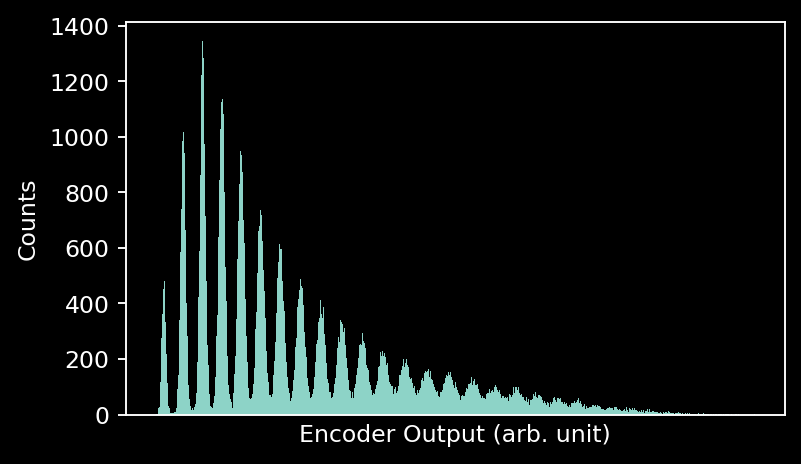

In [133]:
plt.figure(figsize=(5,3), dpi=170)
pl = plt.hist(output, bins=1000)
plt.xticks([])
plt.xlabel("Encoder Output (arb. unit)")
plt.ylabel("Counts")
plt.savefig('Presentation/encoder.png', transparent=True)
#plt.yscale("log")

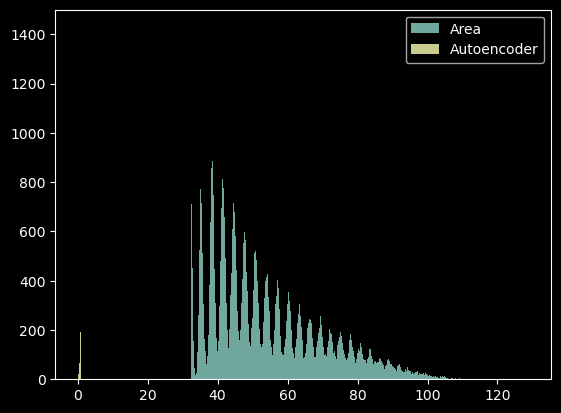

In [103]:
plt.hist(area, bins=1000, alpha=0.8, label="Area")
plt.hist(output, bins=1000, alpha=0.8, label="Autoencoder")

#plt.yscale("log")
plt.ylim(0,1500)
plt.legend()

In [121]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''

    return 1/(1+np.exp(-10*x))

In [127]:
def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1

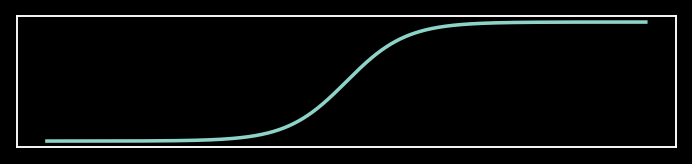

In [125]:
x = np.linspace(-1,1,1000)

plt.figure(figsize=(5,1), dpi=170)
plt.xticks([])
plt.yticks([])
plt.plot(sigmoid(x))
plt.savefig('Presentation/sigmoid.png', transparent=True)

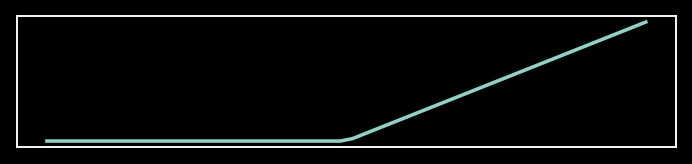

In [129]:
x = np.linspace(-10, 10)

plt.figure(figsize=(5,1), dpi=170)
plt.plot(x, RELU(x))
plt.xticks([])
plt.yticks([])
plt.savefig('Presentation/relu.png', transparent=True)